# **Machine Learning from Data**

## Lab 0: Introduction to Exploratory Data Analysis - Part 1

2021 - Veronica Vilaplana - [GPI @ IDEAI](https://imatge.upc.edu/web/) Research group

-----------------



#1. Introduction to Colab
If you are not familiar with Google Colaboratory, follow this tutorial:
* https://colab.research.google.com/notebooks/intro.ipynb

#2. Introduction to Python
If you are not familiar with Python:

* https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb

* https://www.learnpython.org/

* https://docs.python.org/3/tutorial/ 

* Whirlwind Tour of Python: https://github.com/jakevdp/WhirlwindTourOfPython

#3. Introduction to Exploratory Data Analysis
Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 
The goal of EDA is to explore the data to reveal patterns and features that will help the analyst better understand, analyze and model the data.


In this session we will learn how to do basic EDA to analyze the gaussianity of synthetic data and to explore a simple dataset

##Part1: Synthetic Datasets

Importing the required libraries.

The first step is to import the libraries we will need: NumPy, Matplotlib, Pandas and Seaborn. When importing a library, you can assign it an alias to reduce the amount of typing required to use each library's properties. 

* [NumPy](https://numpy.org/doc/stable/user/index.html) is a library adding support for multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

* [Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.

* [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) is a library for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. 

* [Seaborn](https://seaborn.pydata.org/) is a library for data visualization that provides a high-level interface for drawing attractive and informative statistical graphics.

* [SciPy](https://www.scipy.org/scipylib/index.html) is a library with routines for numerical integration, interpolation, optimization, linear algebra, and statistics. `SciPy.stats`
is the module that contains probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, etc.

The code below shows the necessary import statements:

In [1]:
import numpy as np              #import numpy with the alias np
import matplotlib.pyplot as plt #import matplotlib.pyplot with the alias plt
import pandas as pd             #import pandas with the alias pd
import seaborn as sns           #import seaborn with the alias sns
import scipy.stats as ss        #import scipy.stats with the alias ss

###Generation of random samples
We will generate random samples from different distributions and use EDA tools to analyze the gaussianity of the samples.

Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions. We call default_rng to get a new instance of a Generator, then call its methods to obtain samples from different distributions (https://numpy.org/doc/stable/reference/random/index.html). We use a seed to initialize the BitGenerator, so that every execution will raise same random sequences of results. 

First we plot histograms.

In [2]:
n= 100000
nbins = 50
from numpy.random import default_rng

# initialize a random seed such that every execution will raise same random sequences of results
rng = default_rng(seed=1)

###Gaussian distribution

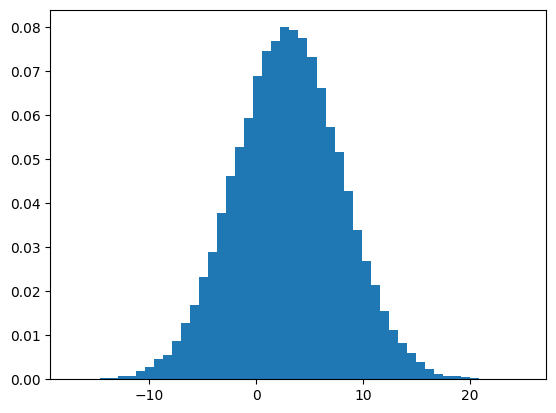

In [3]:
nmu, nsigma = 3,5
data_normal = rng.normal(nmu, nsigma, n)
plt.hist(data_normal, nbins, density=True)
plt.show()

###Uniform distribution

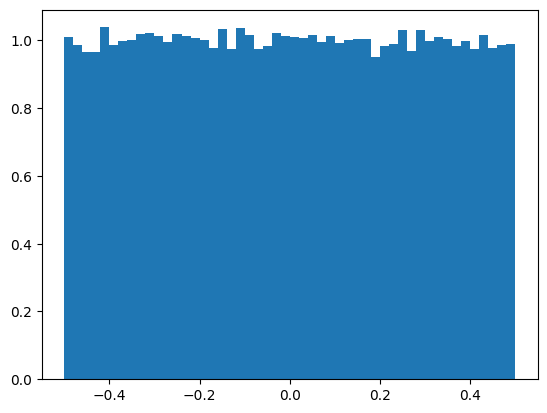

In [4]:
data_uniform = rng.uniform( -0.5, 0.5, n)
plt.hist(data_uniform, nbins, density=True)
plt.show()

### Laplacian distribution

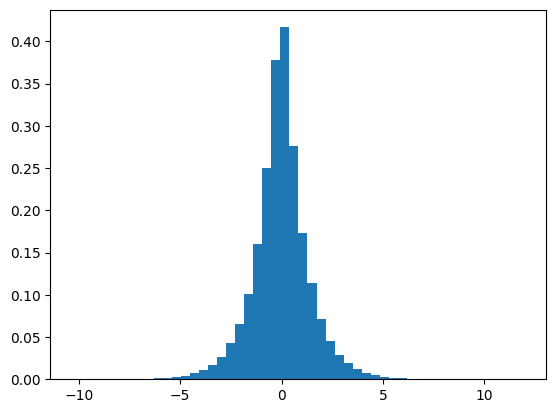

In [5]:
data_laplace = rng.laplace( 0, 1, n)
plt.hist(data_laplace, nbins, density=True)
plt.show()

### Rayleigh distribution

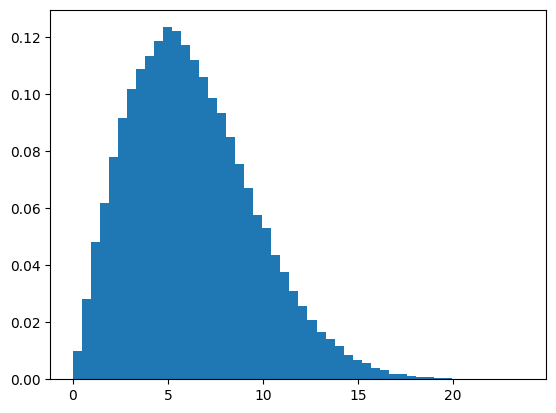

In [6]:
data_rayleigh = rng.rayleigh(5, n)
plt.hist(data_rayleigh, nbins, density=True)
plt.show()

###Fitting a Normal Distribution
We can use `histplot` to fit a parametric distribution (a normal distribution in this case) and visually evaluate how closely it corresponds to the observed data.

We will use `histplot` from Seaborn, a library for making statistical graphics in Python. We will explore more functions from this library in the second part of this lab. Check more details [here](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-hist)

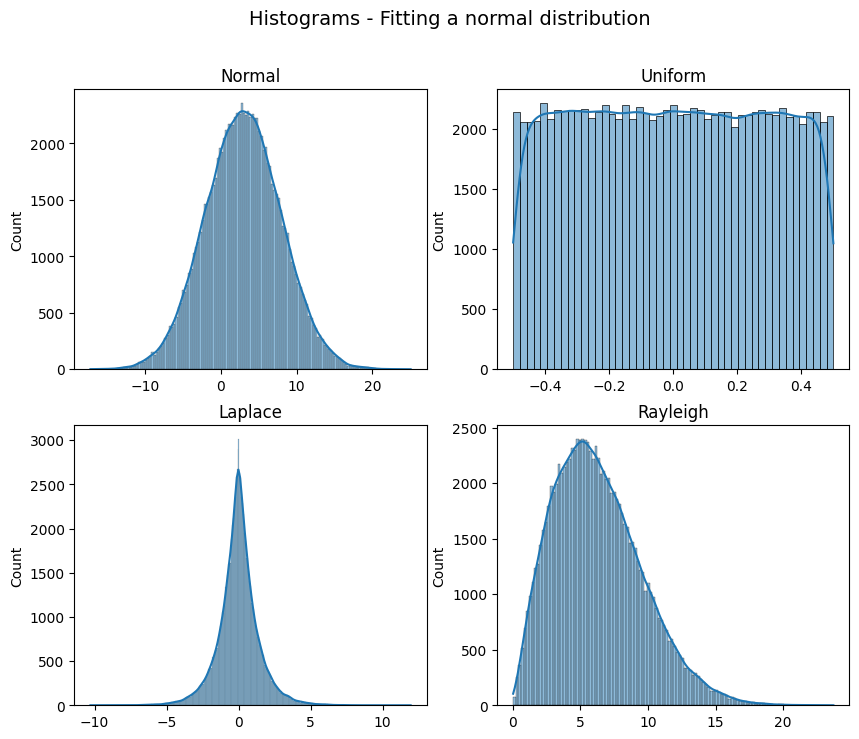

In [7]:
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10,8), ncols=2, nrows=2)
fig.suptitle('Histograms - Fitting a normal distribution', fontsize=14)
sns.histplot(data=data_normal, kde=True, ax=ax[0][0])
sns.histplot(data=data_uniform, kde=True, ax=ax[0][1])
sns.histplot(data=data_laplace,  kde=True, ax=ax[1][0])
sns.histplot(data=data_rayleigh, kde=True, ax=ax[1][1])
ax[0][0].set_title('Normal')
ax[0][1].set_title('Uniform')
ax[1][0].set_title('Laplace')
ax[1][1].set_title('Rayleigh')

plt.show()

###Cumulative distribution function

We can use `scipy.stats.norm.cdf` to show the cumulative distribution function, 

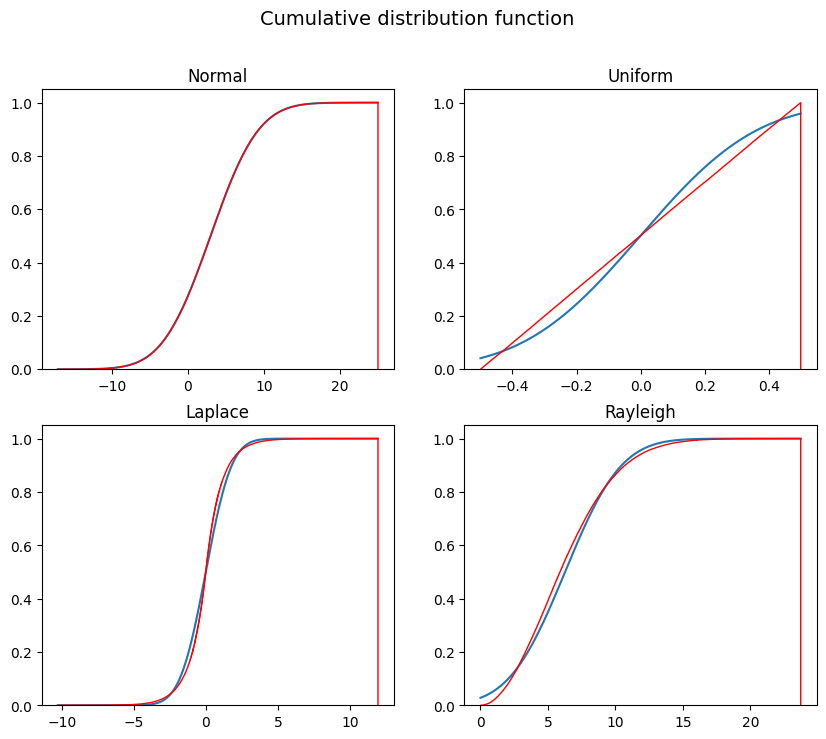

In [9]:
fig, ax = plt.subplots(figsize=(10,8), ncols=2, nrows=2)
fig.suptitle('Cumulative distribution function', fontsize=14)
npoints = 10000

plt.subplot(2,2,1)
x = np.linspace(np.min(data_normal),np.max(data_normal),npoints)
ncdf = ss.norm.cdf(x,np.mean(data_normal),np.std(data_normal));
plt.plot(x,ncdf)
plt.hist(data_normal, npoints, density=True,histtype='step',cumulative=True,color='r')
plt.title('Normal')

plt.subplot(2,2,2)
x = np.linspace(np.min(data_uniform),np.max(data_uniform),npoints)
ncdf = ss.norm.cdf(x,np.mean(data_uniform),np.std(data_uniform));
plt.plot(x,ncdf)
plt.hist(data_uniform, npoints, density=True,histtype='step',cumulative=True,color='r')
plt.title('Uniform')

plt.subplot(2,2,3)
x = np.linspace(np.min(data_laplace),np.max(data_laplace),npoints)
ncdf = ss.norm.cdf(x,np.mean(data_laplace),np.std(data_laplace));
plt.plot(x,ncdf)
plt.hist(data_laplace, npoints, density=True,histtype='step',cumulative=True,color='r')
plt.title('Laplace')

plt.subplot(2,2,4)
x = np.linspace(np.min(data_rayleigh),np.max(data_rayleigh),npoints)
ncdf = ss.norm.cdf(x,np.mean(data_rayleigh),np.std(data_rayleigh));
plt.plot(x,ncdf)
plt.hist(data_rayleigh, npoints, density=True,histtype='step',cumulative=True,color='r')
plt.title('Rayleigh')

plt.show()


###Kurtosis and Skewness
**Kurtosis** is the fourth central moment divided by the square of the variance. If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution. The distribution with a higher kurtosis has a heavier tail. The zero valued kurtosis of the normal distribution in Fisher’s definition can serve as a reference point.

The **skewness** measures the symmetry of a data set. 
For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution.

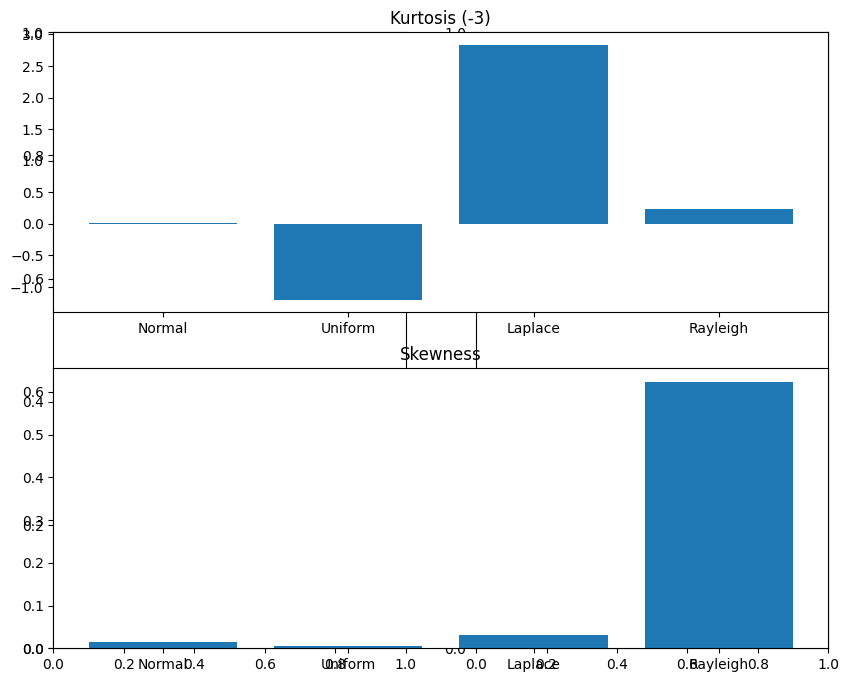

In [10]:
all_data = np.vstack((data_normal,data_uniform, data_laplace, data_rayleigh))
dkurt = ss.kurtosis(all_data,axis=1)
dskew = ss.skew(all_data,axis=1)

dist = ('Normal','Uniform','Laplace','Rayleigh')
pos = np.arange(len(dist))

fig, ax = plt.subplots(figsize=(10,8), ncols=2, nrows=1)

plt.subplot(2,1,1)
plt.bar(pos, dkurt, align='center')
plt.xticks(pos,dist)
plt.title('Kurtosis (-3)')

plt.subplot(2,1,2)
plt.bar(pos, dskew, align='center')
plt.xticks(pos,dist)
plt.title('Skewness')

plt.show()

###Quantile-quantile plots

`scipy.stats.probplot` generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default).

`probplot` optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.

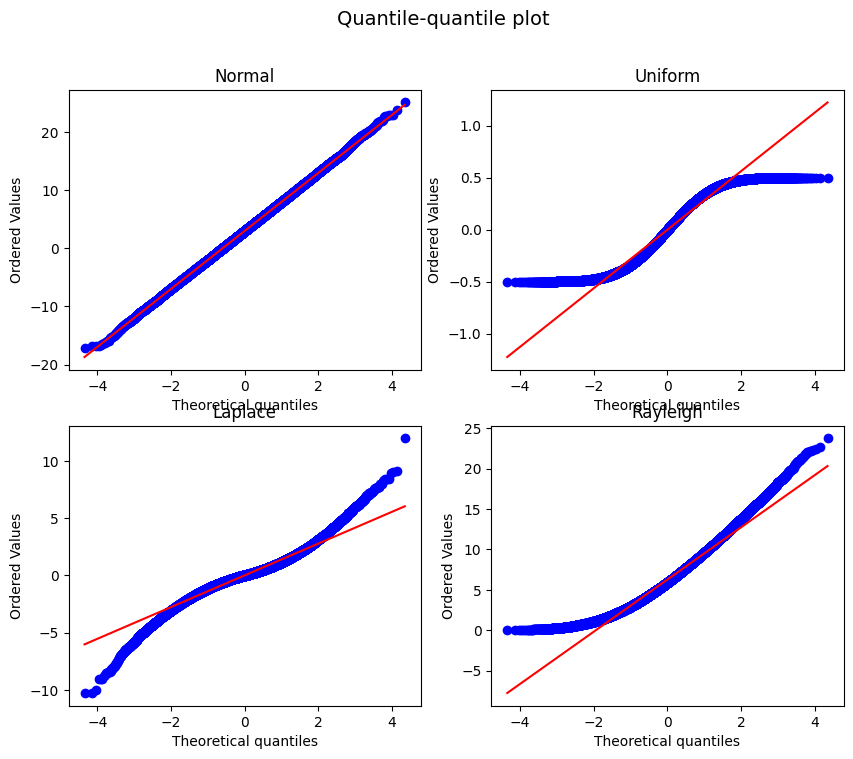

In [11]:
fig, ax = plt.subplots(figsize=(10,8), ncols=2, nrows=2)
fig.suptitle('Quantile-quantile plot', fontsize=14)

plt.subplot(2,2,1)
ss.probplot(data_normal, plot=plt)
plt.title('Normal')

plt.subplot(2,2,2)
ss.probplot(data_uniform, plot=plt)
plt.title('Uniform')

plt.subplot(2,2,3)
ss.probplot(data_laplace, plot=plt)
plt.title('Laplace')

plt.subplot(2,2,4)
ss.probplot(data_rayleigh, plot=plt)
plt.title('Rayleigh')

plt.show()